In [15]:
"""
a) Compute the principal components (PCs) using first 190 individuals’ neutral expression
image. Plot the singular values of the data matrix and justify your choice of
principal components.

(b) Reconstruct one of 190 individuals’ neutral expression image using different number
of PCs. As you vary the number of PCs, plot the mean squared error (MSE) of
reconstruction versus the number of principal components to show the accuracy of
reconstruction. Comment on your result.

(c) Reconstruct one of 190 individuals’ smiling expression image using different number
of PCs. Again, plot the MSE of reconstruction versus the number of principal
components and comment on your result.

(d) Reconstruct one of the other 10 individuals’ neutral expression image using different
number of PCs. Again, plot the MSE of reconstruction versus the number of principal
components and comment on your result.

(e) Use any other non-human image (e.g., car image, resize and crop to the same size),
and try to reconstruct it using all the PCs. Comment on your results.

(f) Rotate one of 190 individuals’ neutral expression image with different degrees and
try to reconstruct it using all PCs. Comment on your results.
"""

import numpy as np 
import scipy.linalg as la
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import image
import glob 
import os 

if 'data' not in os.listdir():
    os.chdir('../')
    
# to view the result 
#plt.imshow(your_face.reshape(height, width), cmap ='gray') 

In [16]:
def jpegs_to_matrix(jpegs):
    """
    converts a list of jpegs of the same size into a matrix.
    """
    data = []
    for fn in jpegs:
        img_mat = image.imread(fn)
        img_mat = img_mat.flatten()
        data.append(img_mat)
    data = np.mat(data)
    return(data)

In [17]:
# Loading all the datasets  
neutral_fns = 'data/frontalimages_spatiallynormalized_cropped_equalized_part*/*a.jpg'
neutral_fns = glob.glob(neutral_fns)
neutral_data = jpegs_to_matrix(neutral_fns)
neutral_data = neutral_data / 255
neutral_190 = neutral_data[0:190].T
neutral_single = neutral_data[190].T

smiling_fns = 'data/frontalimages_spatiallynormalized_cropped_equalized_part*/*b.jpg'
smiling_fns = glob.glob(smiling_fns)
smiling_data = jpegs_to_matrix(smiling_fns)
smiling_data = smiling_data / 255
smiling_single = smiling_data[190].T

guitar = image.imread('figures/guitar_bw_196_162.jpg').flatten()

# Part A: calculate the principle components 
# - computer the PC's 
# - plot the singular values of the data matrix 

# Part B: reconstruct a neutral face using an increasing amount of PC's
# - reconstruct
# - plot the mean squared error vs PC's

# Part C: reconstruct a smiling face using an increasing amount of PC's
# - reconstruct
# - plot the mean squared error vs PC's

# Part D: reconstruct a neutral face (from the 10 unused samples) 
# using an increasing amount of PC's
# - reconstruct
# - plot the mean squared error vs PC's

# Part E: use any other non-human image 

# Part F: rotate an individuals neutral face and reconstruct with all PC's

## Calculating Eigenfaces

In [18]:
# saving the number of columns 
M = neutral_190.shape[1]

In [19]:
# calculating the mean value across the row (psi vector)
psi_vec = np.mean(neutral_190, axis=1)

In [20]:
# calculating the standardized values (phi matrix)
phi_matrix = neutral_190.copy()
for j in range(phi_matrix.shape[1]): 
    phi_matrix[:,j] = phi_matrix[:,j] - psi_vec

In [21]:
A = phi_matrix

In [22]:
# calculating the covariance matrix C 
C = A * A.T

### Solving the subproblem

In [23]:
# calculating A^t * A and its eigenvectors 
L = A.T * A
v_evals, v_evecs = la.eig(L)

In [24]:
# calculating the eigen vectors for the C matrix 
u_evecs = np.zeros(A.shape)
for l in range(M):
    curr_evec = np.zeros((A.shape[0], 1)) 
    for k in range(M):          
        curr_evec = curr_evec + (v_evecs[l][k] * A[:, k])    
    
    u_evecs[:, l] = curr_evec.ravel()

In [25]:
u_evecs[:, 0]

array([ 0.31220685,  0.2938306 ,  0.23725039, ..., -0.08982312,
       -0.05566334, -0.02101626])

## Testing the eigenvectors and eigenvalues for validity 

In [27]:
u_eval = np.dot(C[0, :], u_evecs[:, 0]) / u_evecs[0, 0]
u_eval = u_eval[0, 0]

In [28]:
lhs = C * u_evecs[:, 0].reshape((-1, 1))

In [29]:
lhs

matrix([[  615.30806598],
        [  853.14295465],
        [  618.665778  ],
        ...,
        [-2997.45826724],
        [-3074.58250774],
        [-3231.31782147]])

In [31]:
rhs = u_evecs[:, 0].reshape((-1, 1)) * u_eval

In [32]:
rhs

array([[ 615.30806598],
       [ 579.09151022],
       [ 467.58127345],
       ...,
       [-177.02650466],
       [-109.7032375 ],
       [ -41.41956442]])

## Testing version 2 

Try computing Cu by first computing y = A^Tu and then Ay. Is this different? It is possible that due to numerical precision these may not match. But I do not think these would differ.

In [35]:
y = A.T * u_evecs[:, 0].reshape((-1, 1))

In [36]:
Cu = A * y 

In [37]:
Cu

matrix([[  615.30806598],
        [  853.14295465],
        [  618.665778  ],
        ...,
        [-2997.45826724],
        [-3074.58250774],
        [-3231.31782147]])

$u = \frac{Av}{||Av||_2}$

## New calculation of evecs 

In [38]:
# calculating the eigen vectors for the C matrix 
u_evecs = np.zeros(A.shape)
for l in range(M):
    Av = A * v_evecs[:, l].reshape((-1, 1))
    norm_Av = np.linalg.norm(Av, ord=2)  
    
    u = (Av / norm_Av)
    u_evecs[:, l] = u.ravel()

In [39]:
lhs = C * u_evecs[:, 0].reshape((-1, 1))

In [40]:
lhs

matrix([[-60.47895736],
        [-76.65498861],
        [-70.29810819],
        ...,
        [124.54313128],
        [132.76723185],
        [141.57674124]])

In [41]:
lambdah = np.dot(C[0,:], u_evecs[:, 0]) / u_evecs[0,0]
lambdah = lambdah[0,0]

In [42]:
rhs = lambdah * u_evecs[:, 0]

In [43]:
rhs

array([-60.47895736, -76.65498861, -70.29810819, ..., 124.54313128,
       132.76723185, 141.57674124])

## Facial reconstruction 

In [44]:
weights = np.zeros(M)
for i in range(M):
    weights[i] = np.dot(u_evecs[:, i], A[:, 0])

In [45]:
reconstruction = u_evecs * weights.reshape((1, -1))
reconstruction = np.sum(reconstruction, axis=1)
reconstruction = psi_vec + reconstruction.reshape((-1, 1))
reconstruction = reconstruction * 255

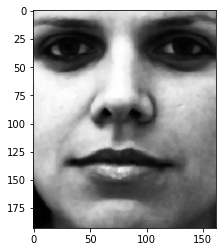

In [49]:
plt.imshow(reconstruction.reshape(193, 162), cmap ='gray') 

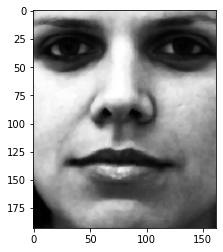

In [50]:
plt.imshow(neutral_190[:, 0].reshape(193, 162), cmap ='gray') 